# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [14,79,276]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,24653,9465,12091,294,5058,2168
1,1640,3259,3655,868,1202,1653
2,27901,3749,6964,4479,603,2503


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Sample 0: This costumer has expenses above the 75th percentile in all categories except Frozen which is below the 25th percentile.Costumer seems to be stocked across the board and is very likely to be a retailer.

Sample 1: The relative low expenditures on perishables, frozen (above the 50th), fresh(above 25th) and increased purchases of non-perishables Grocery above 75th. Furthermore, Milk and Delicattesen (above 50th) expenses are relatively high (both above the 50th) and they could be either perishable or non-perishable. When taking all of these facts into consideration they point towards an establishment that prepares breakfast food. This costumer could be a small cafe.

Sample 2: This establishment has a high expenditure Fresh (75th) and Frozen(75th) and moderate on Grocery (50th). Delicatessen expenditures are also high (75th).Detergents_Paper (above 25th) and Milk (above 50th) are relatively low. This costumer could be a restaurant.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Detergents_Paper', axis=1)
target0=data['Detergents_Paper'].values
#print target1

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data, target0, test_size=0.25,random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor=regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)

print score

0.707142430715


In [5]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Grocery', axis=1)
target1=data['Grocery'].values
#print target1

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data, target1, test_size=0.25,random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor=regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)

print score

0.602637147634


In [6]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Fresh', axis=1)
target2=data['Fresh'].values
#print target1

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data, target2, test_size=0.25,random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor=regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)

print score

-0.390537764487


## Results

Prediction is shown for 3 different features Detergents_Paper, Grocery and Fresh (dropped from dataset and used as target to be predicted by the remaining features). The highest score is the one for Detergents_Paper, which means this feauture has a stronger correlation with the rest of the dataset. Fresh has the lowest score of the three, which means it provides useful information for analysis (variation ortoghonal to the other features).

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

Detergents_Paper, Grocery and Fresh where used as targets, one at a time, to show how they correlate to the rest of the features. The higher the score the stronger the corrleation. By finding the feature that has the strongest correlation witht the rest, we can drop it from the calculations and not loose important variations for customer habits identification. In this case, Detergents_Paper had the higher score.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

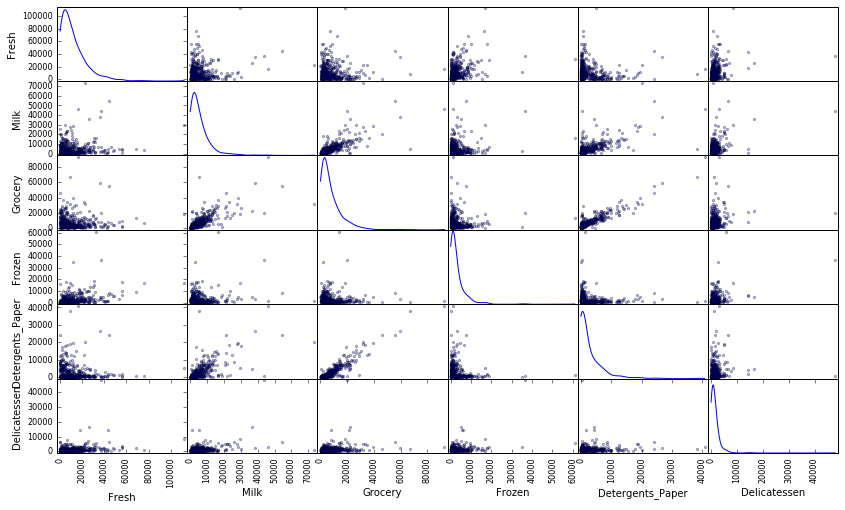

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

Detergents_Paper shows a high degree of correleation with Milk and Groceries, confirming our result above where Detergents_Paper was predicted by the other features with a high prediction score. Most of the features have skewed right distributions.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

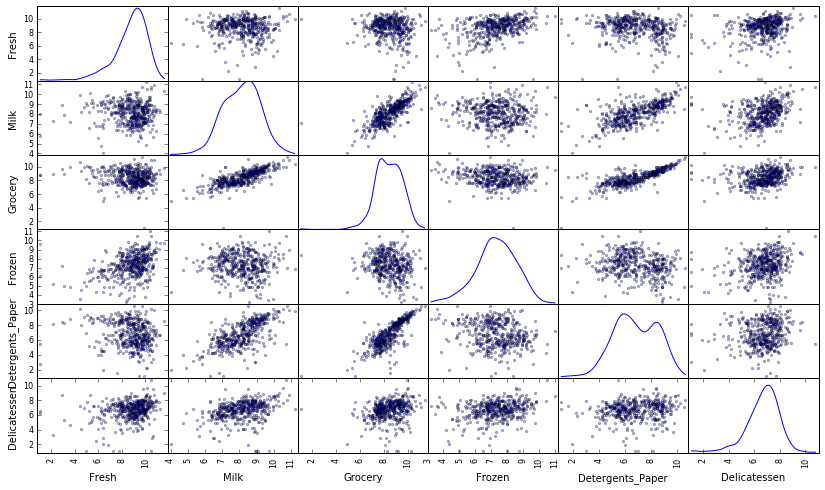

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## Results

Delicatessen and Fresh have normal distributions and Frozen, Detergent_Paper, Grocery and Milk are bimodal.

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.112654,9.155356,9.400217,5.683580,8.528726,7.681560
1,7.402452,8.089176,8.203851,6.766192,7.091742,7.410347
2,10.236418,8.229244,8.848509,8.407155,6.401917,7.825245


## Result

Based on this table, the correlation between samples 1 and 2 is less noticeable. They were described above as being cafe/restaurant as opposed to a retailer description for sample 0. That classification is now less obvious.

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [10]:
outliers_list=()
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature].values,25)
    
    print Q1
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature].values,75)
    
    print Q3
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    
    print step
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
        
    outliers=log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]

    display(outliers)
    
    outliers_list=outliers_list+ tuple(outliers.index.values)
    
    
# OPTIONAL: Select the indices for data points you wish to remove


outliers_f= sorted(list(set(outliers_list)))



# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers_f]).reset_index(drop = True)

print "Wholesale customers dataset has {} samples with {} features each.".format(*good_data.shape)

8.04805870221
9.73706394795
2.53350786861
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


7.33498124004
8.88048008859
2.31824827282
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


7.67461620137
9.27385367724
2.3988562138
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


6.60967774917
8.17589608318
2.34932750101
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


5.54810142479
8.27434059875
4.08935876094
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


6.01187465693
7.50672842655
2.24228065442
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Wholesale customers dataset has 398 samples with 6 features each.


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.*

**Answer:**

Yes, all features have at least 2 outliers. They should be removed because the clustering analysis and cluster center calculation would be affected by them. If an outlier is chosen as an initial cluster seed, it could skew the cluster center at best or generate a one data point cluster at worst.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

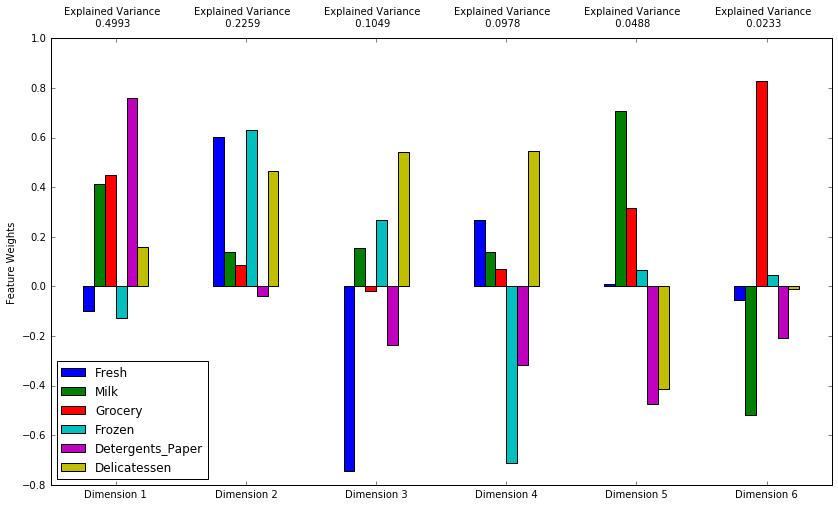

In [11]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

pca = PCA(n_components=6).fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

[ 49.93  72.52  83.01  92.79  97.67 100.  ]


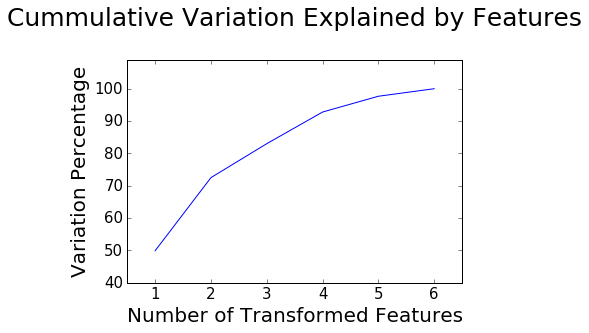

In [12]:
import matplotlib.pylab as plt


#Using explained_variance _ratio_ and np.cumsum to calculate the accumulated variance. 

var=pca.explained_variance_ratio_

var2=np.cumsum(np.round(var,decimals=4)*100)



print var2

x=[1,2,3,4,5,6]
y=var2

plt.xlabel('Number of Transformed Features', fontsize=20)
plt.ylabel('Variation Percentage', fontsize=20)
plt.title('Cummulative Variation Explained by Features', fontsize=25, y=1.13)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(.5, 6.5)
plt.ylim(40,109)

plt.plot(x,y)
plt.show()

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

72.52% if the variance is explained by the first two principal components and 92.79% for the first 4 components. The first parameter has more positive variance with the Non-perishables (Grocery, Detergents_paper) and with Milk (a mix of Perishable and Non-perishable item). The second component is dominated by the Perishables (Frozen, Fresh) and the mixed Delicatessen). The third is again dominated by the Perishables but this time there is a negative correlation between Fresh and Delicatessen/Frozen. The fourth component captures again the negative correlation between Delicatessen and Frozen and to lesser extent the one between Detergents_paper and Fresh.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [13]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.4376,0.1765,-1.1367,1.7012,-0.2464,-0.2406
1,0.4515,-1.0893,1.2222,0.2806,-0.5476,-0.1781
2,-0.1453,1.9394,-0.0562,0.3747,0.0536,0.3454


## Results

Here we can seee that sample 0 is definitely different than samples 1 and 2. A clear distinction can be observed in the first 4 dimensions. Additionally, a noticeable difference between samples 1 and 2 hints at a more subtle classification between the two.

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [14]:
# TODO: Apply PCA by fitting the good data with only two dimensions
## Here we have implemented a code to run over 2 to 5 dimensions, for comparison purposes. 

pca_comp={}

for item in range(2,6,1):
    
    pca_comp[item] = PCA(n_components=item).fit(good_data)

# TODO: Transform the good data using the PCA fit above

reduced_data={}

for item in pca_comp:
    
    reduced_data[item] = pca_comp[item].transform(good_data)

#print reduced_data

# TODO: Transform the sample log-data using the PCA fit above

pca_samples={}

for item in pca_comp:

    pca_samples[item] = pca_comp[item].transform(log_samples)

# Create a DataFrame for the reduced data

reduced_data_pd={}

for item in reduced_data: 

    columns_names = ['Dimension '+ str(iterator) for iterator in range(1,item+1,1)]
#    print(columns_names)

    reduced_data_pd[item] = pd.DataFrame(reduced_data[item], columns = columns_names)
    
#    print(reduced_data_pd[2])

#print reduced_data

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [15]:
# Display sample log-data after applying PCA transformation in two dimensions
## The code will produce tables for PCA transformations from 2 to 5 dimensions

for item in pca_samples: 

    columns_names = ['Dimension '+ str(iterator) for iterator in range(1,item+1,1)]
    display(pd.DataFrame(np.round(pca_samples[item], 4), columns = columns_names))

    


,Dimension 1,Dimension 2
0,2.4376,0.1765
1,0.4515,-1.0893
2,-0.1453,1.9394


,Dimension 1,Dimension 2,Dimension 3
0,2.4376,0.1765,-1.1367
1,0.4515,-1.0893,1.2222
2,-0.1453,1.9394,-0.0562


,Dimension 1,Dimension 2,Dimension 3,Dimension 4
0,2.4376,0.1765,-1.1367,1.7012
1,0.4515,-1.0893,1.2222,0.2806
2,-0.1453,1.9394,-0.0562,0.3747


,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5
0,2.4376,0.1765,-1.1367,1.7012,-0.2464
1,0.4515,-1.0893,1.2222,0.2806,-0.5476
2,-0.1453,1.9394,-0.0562,0.3747,0.0536


## Results

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

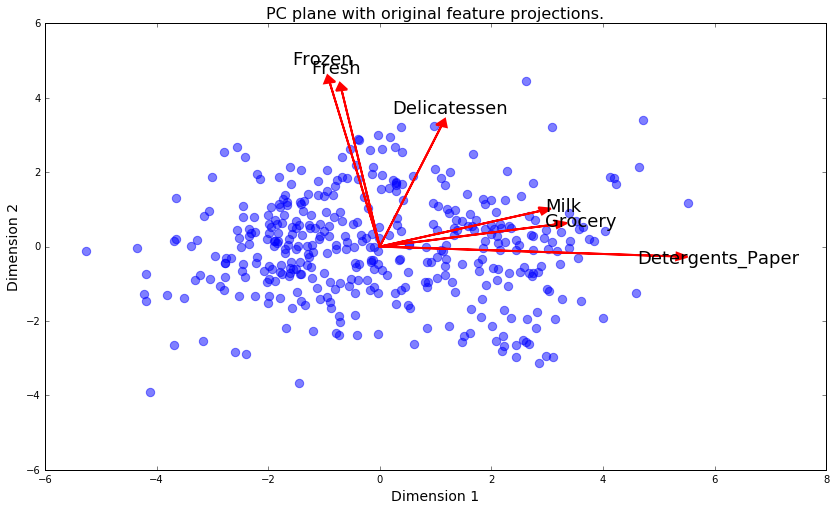

In [16]:
# Create a biplot
## The biplot shows the PCA transformation with 2 dimensions
vs.biplot(good_data, reduced_data_pd[2], pca_comp[2])

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

### Analysis of Byplot

Fresh and Frozen categories are strongly correlated while Milk and Grocery present a high correlation as well. Milk, Grocery and Detergent_Papers show strong correlation with dimension 1 and Fresh, Frozen and are correlated witht dimension 2. Finally, Delicatessen has correlation with both dimensions.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

The Gaussian Mixture Model implements a set of multidimensional gaussians to model the clusters. GMM assigns probabilities to each data point based on those gaussians. The K-means clustering algorithm sets a definite label to each sample point based of the distance between them.

K-means is not flexible enough to model different scenarios while GMM can be tweaked by changing the initial weights or the type of covariance matrix.Nevertheless, K-means is the faster of the two due to its simplicity.

For our particular problem, the matrix plot above shows that distribution of some of the variables are bimodal. We believe K-means is a good way to describe the clustering while GMM could be afected by this bimodality. As a general approach K-means is a good solution for an initial analysis and in fact K-means is often used as a first estimation for the GMM model.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

## Observation

We use PCA transformation with 2 components for the final calculations. Different values for the PCA components were run and n_components=2 provided the highest scores. 

In [17]:
# TODO: Apply your clustering algorithm of choice to the reduced data
## We keep the PCA transformation with 2 components for these calculations 

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as gm 

reduced_data_best=reduced_data[2]
pca_samples_best=pca_samples[2]

clst_km={}
clst_gm={}

for item in range(2,6,1):

    clst_km[item] = KMeans(item).fit(reduced_data_best)
    clst_gm[item] = gm(item).fit(reduced_data_best)
    
# TODO: Predict the cluster for each data point

pred_km={}

for item in clst_km:
    
    pred_km[item]=clst_km[item].predict(reduced_data_best)

pred_gm={}

for item in clst_gm:
    
    pred_gm[item]=clst_gm[item].predict(reduced_data_best)

# TODO: Find the cluster centers
center_km={}

for item in clst_km:

    center_km[item]=clst_km[item].cluster_centers_
    
center_gm={}

for item in clst_gm:

    center_gm[item]=clst_gm[item].means_
    
# TODO: Predict the cluster for each transformed sample data point

sample_pred_km={}

for item in clst_km:
    
    sample_pred_km[item]=clst_km[item].predict(pca_samples_best)


sample_pred_gm={}

for item in clst_gm:
    
    sample_pred_gm[item]=clst_gm[item].predict(pca_samples_best)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn.metrics import silhouette_score

stte_score_km={}

for item in pred_km:
    
    stte_score_km[item]=silhouette_score(reduced_data_best, pred_km[item])
    print 'Silhouette score for ',item,' Kmeans clusters PCA with 2 components= ', stte_score_km[item] 

stte_score_gm={}

for item in pred_gm:
    
    stte_score_gm[item]=silhouette_score(reduced_data_best, pred_gm[item])
    print 'Silhouette score for ',item,' Gaussian Mixture Model clusters and PCA with 2 components= ',\
          stte_score_gm[item] 



Silhouette score for  2  Kmeans clusters PCA with 2 components=  0.447157742293
Silhouette score for  3  Kmeans clusters PCA with 2 components=  0.364874035612
Silhouette score for  4  Kmeans clusters PCA with 2 components=  0.331150954285
Silhouette score for  5  Kmeans clusters PCA with 2 components=  0.351089087249
Silhouette score for  2  Gaussian Mixture Model clusters and PCA with 2 components=  0.446753526945
Silhouette score for  3  Gaussian Mixture Model clusters and PCA with 2 components=  0.359479670374
Silhouette score for  4  Gaussian Mixture Model clusters and PCA with 2 components=  0.312741893915
Silhouette score for  5  Gaussian Mixture Model clusters and PCA with 2 components=  0.313568743105


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

The silhouette score is higher when using K-means and the combination of PCA components : 2 and Clusters = 2. Other combinations where calculated, but ultimately 2 clusters always had the highest score. Across different values for PCA components, 2 had the highest score.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

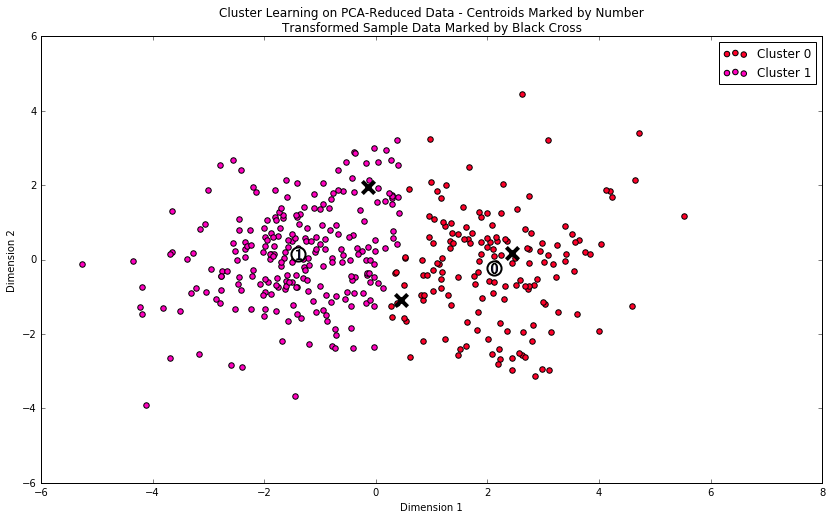

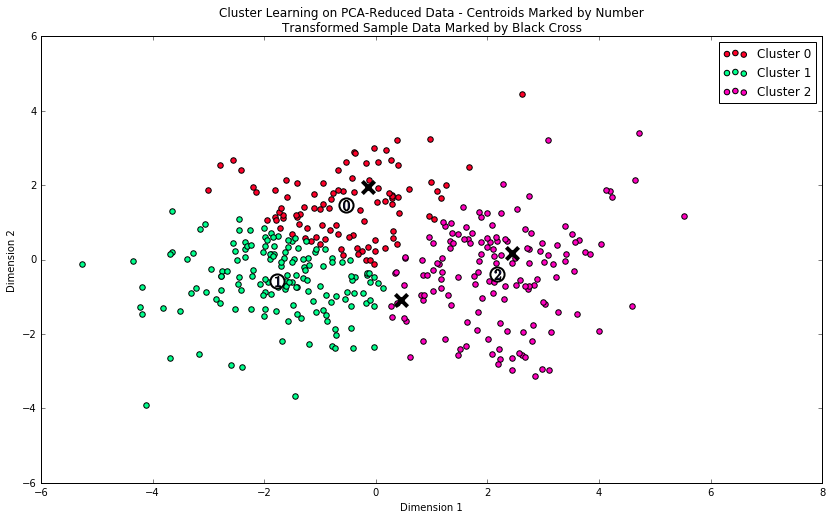

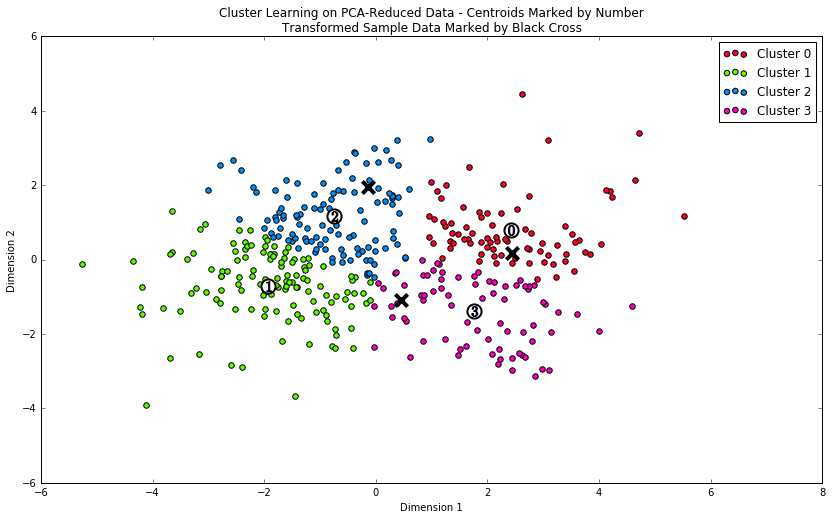

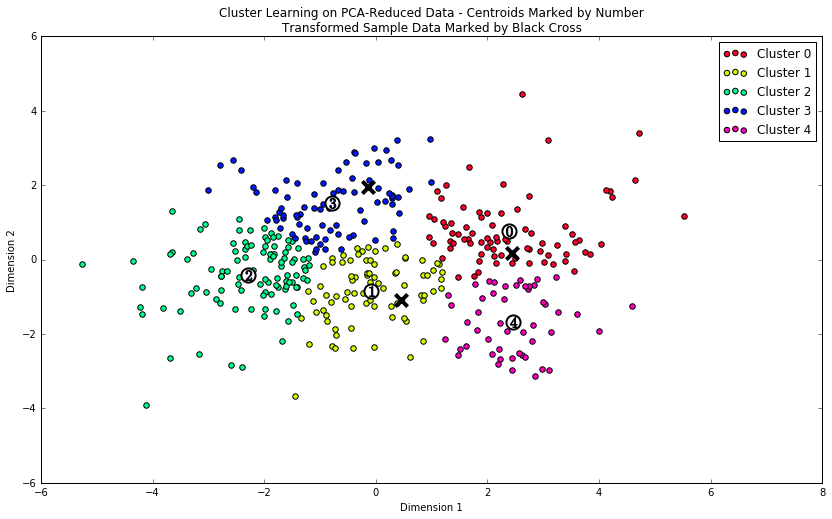

In [18]:
# Display the results of the clustering from implementation
## Showing upt to 5 cluster for comparison purposes. The final plot if the first (2 clusters)
for item in clst_km:
    
    reduced_data_temp=reduced_data_pd[2]

    vs.cluster_results(reduced_data_temp, pred_km[item], center_km[item], pca_samples_best)

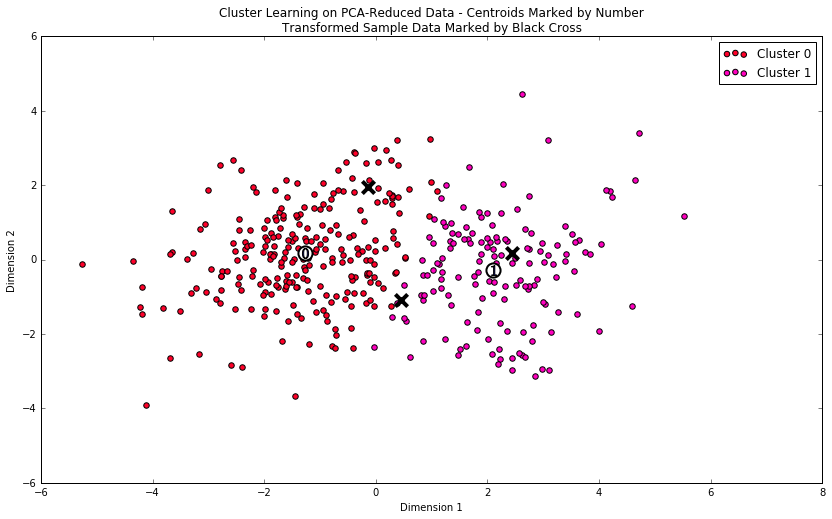

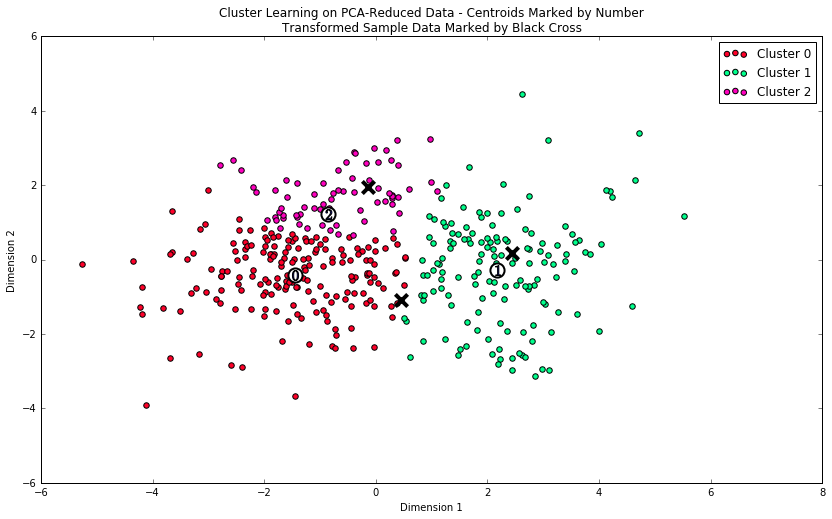

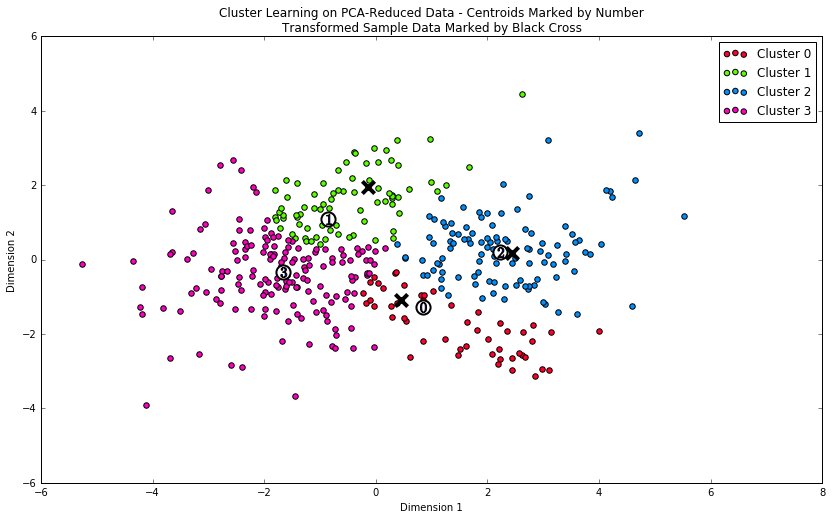

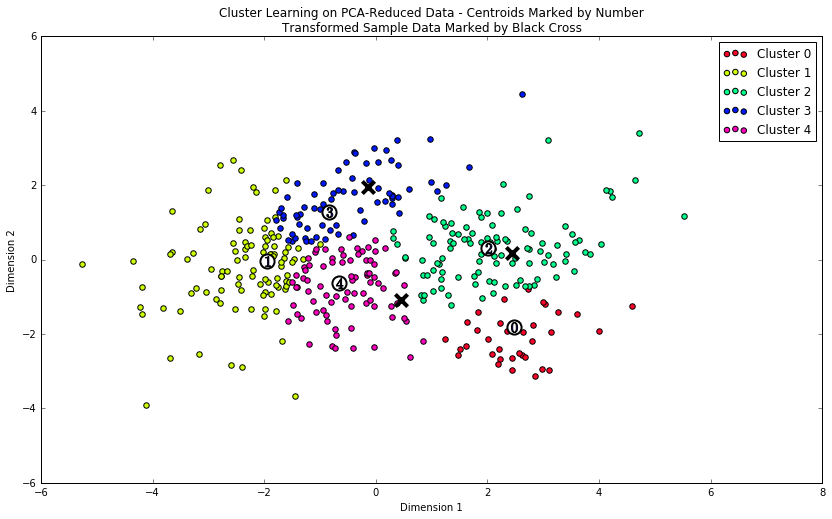

In [19]:
for item in clst_gm:
    
    reduced_data_temp=reduced_data_pd[2]

    vs.cluster_results(reduced_data_temp, pred_gm[item], center_gm[item], pca_samples_best)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [20]:
# TODO: Inverse transform the centers
log_centers = pca_comp[2].inverse_transform(center_km[2])

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(center_km[2]))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

display(true_centers - data.mean().round())
display(true_centers - data.median().round())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0
Segment 1,9451.0,1938.0,2449.0,2200.0,307.0,771.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-6576.0,1984.0,3581.0,-1949.0,1563.0,-389.0
Segment 1,-2549.0,-3858.0,-5502.0,-872.0,-2574.0,-754.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3080.0,4153.0,6776.0,-403.0,3628.0,170.0
Segment 1,947.0,-1689.0,-2307.0,674.0,-509.0,-195.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

For Segment 0: Milk(75th percentile), Grocery(75th), Detergent_Papers(75th), Delicattesen (50th) are all relatively high. Fresh (25th percentile) and Frozen (25th) are low in comparison.

For Segment 1 we have the inverse correlation. Milk (25th), Grocery(25th), Detergent_Papers(25th), Delicatessen(25th) all have lower numbers. In contrast, Fresh (50th) and Frozen (50th) are relatively high. 

Segment 0 roughly matches a retailer expenses and Segment 1 matches those of a restaurant. This recovered table from the cluster centers are good representations of the segments they represent. 

Finally, by inspecting the byplot and matrix graphs, we can classify the customers in 'Perishable' and 'Not Perishable'. The byplot shows Detergent_Paper (Non-perishable) is ortogonal to Fresh and Frozen (Perishable), Milk and Groceries are more correlated to Detergent_Paper than to Fresh and Frozen, making them Non-Perishable items. Finally, Delicatessen is more correlated to Fresh and Frozen than Detergent_Paper, and can be classified as Perishable. 



### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [21]:
# Display the predictions
for i, pred in enumerate(sample_pred_km[2]):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**

Samples 0 and 2 concur with our prediction. However, sample 1 is clustered with sample 0 instead of with sample 2, our prediction. When we look at the cluster plot (below) we see that sample 1 is in the boundary of the 2 clusters. Adjustments could be done to the model, and even migrate to a more complex GMM model. 

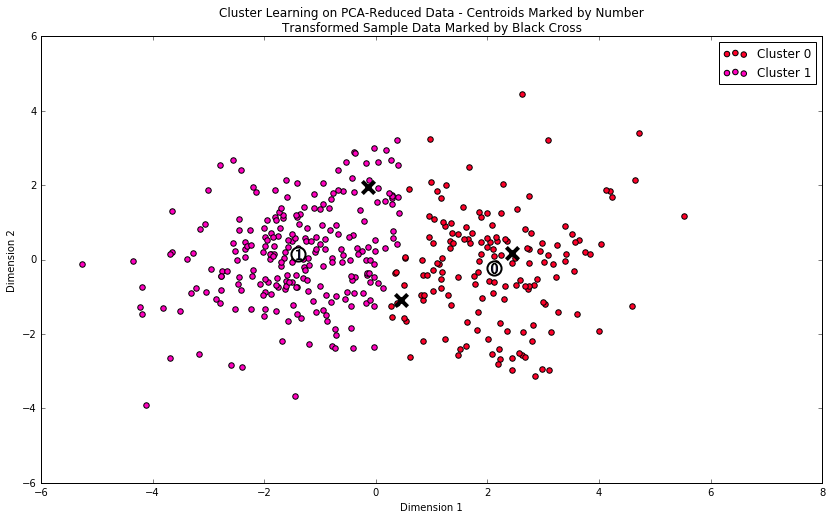

In [22]:
reduced_data_temp=reduced_data_pd[2]

vs.cluster_results(reduced_data_temp, pred_km[2], center_km[2], pca_samples_best)

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

We have identified 2 overall segments: Perishables and Non-Perishables. By reducing the frequency of the deliveries we are increasing the chances of inventory attrition of perishables, creating strain on the supply chain of costumer with a higher proportion of perishables orders (which we have labeled Perishables segment). We can conclude that the Perishables segment will react negatively to a reduction in delivery frequency. On the contrary, non-perishables can be stored potentially indefinitely and the Non-Perishables segment can save on delivery expenses with a reduction of delivery frequency (assuming storage costs are low in comparison to delivery costs).

We could implement an A/B test to determine the impact of a new delivery service. We call Delivery service 1 the current service of 5 times a week and Delivery Service 2 the new proposal of 3 times a week. Furthermore we include the segmentation on Perishables and Non-perishables to select random distributions for the test. The survey for the DS1 control group is designed as an email were the costumer is asked to express its satisfaction with the current delivery service and the survey for the DS2 group asks for the satisfaction is the delivery service change is put into effect. Only positive answers are analyzed below. Guidelines for the final analysis table were taken from this article on [A/B testing](https://en.wikipedia.org/wiki/A/B_testing#Segmentation_and_targeting)

For our type of survey (only two distinct outcomes) we use the binomial distribution. First we calculate the sample size with this [calculator](http://www.evanmiller.org/ab-testing/sample-size.html). If we assume a baseline conversion rate (number of people answering the survey) of 25%, a minumum detectable difference between distributions of 12%, the statistical power (sensitivity as defined in Udacity's [A/B course](https://classroom.udacity.com/courses/ud257/lessons/4018018619/concepts/40043987060923#)) at 80% and $\alpha$ at 5% the sample size required is 212. Since we have 440 costumers we can select two random groups of 212 each. Group A will have the current delivery service and the second group will be offered the new delivery service.

__NOTE__: PrettyTable code obtained from [Julius Schulz](http://blog.juliusschulz.de/blog/ultimate-ipython-notebook#create-tables-with-python-code)'s blog

In [25]:
import PrettyTable as pt

line1=['Total sends', 424 , 212 , 212]
line2=['Total responses', 106, 53, 53 ]
#line3=['Delivery service 1','56/212','12/106','44/106']
#line4=['Delivery service 2','50/212','41/106','9/106']
line3=['DS1','56/106','12/106','44/106']
line4=['DS2','50/106','41/106','9/106']
table=[line1,line2,line3,line4]
pt.PrettyTable(table, [r"$\textbf{}$", r"$\textbf{Overall}$", r"$\textbf{Perishable}$", r"$\textbf{Non perishable}$"]) 

$\textbf{}$,$\textbf{Overall}$,$\textbf{Perishable}$,$\textbf{Non perishable}$
Total sends,424,212,212
Total responses,106,53,53
DS1,56/106,12/106,44/106
DS2,50/106,41/106,9/106


The 'Overall' column shows a definite preference for delivery service 1 (the current service). Segmentation, however, elucidates some of the hidden patterns in the costumer's pereferences. With the current service, DS1, 56/106 (53%) of the costumers are satisfied and 50/106 (47%) would be satisfied with the new one (DS2). What these numbers fail to show is that 39% of the customers (77% of the Perishables segment) prefer DS2. If we offer the DS2 option to following the distribution observed in the table above we could increase satisfaction from 53% to 80%. Furthermore, the results of this A/B test can be used to further fine-tune the Perishables / Non-perishables segmentation.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

In principle, a supervised learning algorithm such as Linear Regresion or Support Machine Vector can be trained using the annual spending estimates per product category as features and the engineered feature found through clustering analysis as the target. Additional subtleties can be introduced to the model, a higher number of clusters, such as the one with the second highest silhouette score found above, and let the algorithms find the best possible model. The roll of the feature selection is to provide as much meaningful variation as possible, and provide the algorithm with the raw data it needs to tune the model.

In this project, clustering analysis enabled the creation of a binary new costumer segment, 'Shelf Life', with Perishables and Non-Perishables as values. Further insight allowed us to link this classification to the most appropriate delivery service and, as a distributor, we can use this new engineered feature as the target of our supervised learning model to determine which delivery service is more appropriate for the new costumers. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

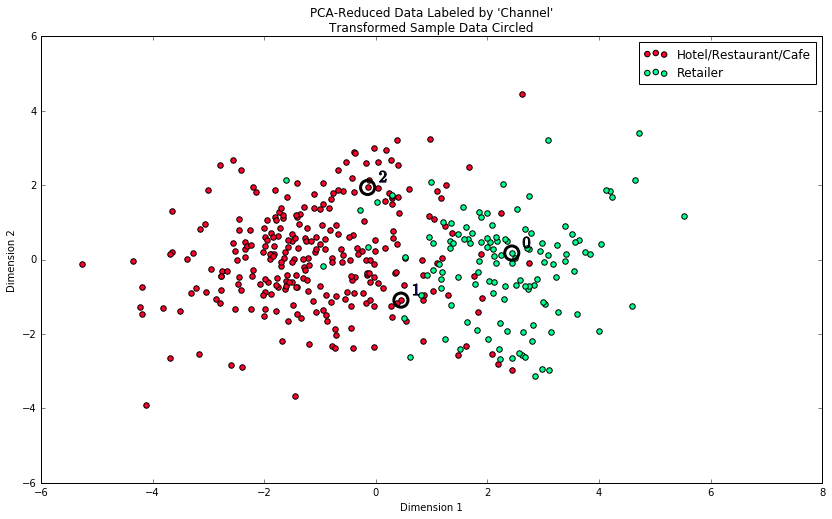

In [24]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data_pd[2], outliers_f, pca_samples[2])

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The Perishable and Non-Perishable classification we chose follows the HRC and Retailers classification very closely. We could fine tune the model by leveraging the results from the A/B test and increasing the number of clusters in order to account for some of the overlapping. 

Overall, the Non-Perishable segment fits a retailer profile and the Non-Perishable segment fits the Hotels/Restaurants/Cafes profile, showing a high degree of consistency in their cluster distributions.

Finally, further model improvement may include a GMM modeling and higher number of clusters.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.